In [59]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import keras
from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing import image


In [98]:
from skimage.transform import resize

In [2]:
#set default path
TRAIN_JSON_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\label\train'
VALID_JSON_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\label\val'
TEST_JSON_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\label\test'

TRAIN_IMG_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\train'
VALID_IMG_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\val'
TEST_IMG_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\test'

TRAIN_SEGMENT_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\segmentation\train'
VALID_SEGMENT_PATH = r'C:\Users\User\Desktop\Code\Github\Final_project\data\segmentation\val'




IMG_ROWS = 256
IMG_COLS = 256

In [3]:
def get_json_list_1d(json_folder_path):
    temp_loader = []
    json_train = []
    emotion_list_json = os.listdir(json_folder_path)

    for emotion in emotion_list_json:
        with open (json_folder_path + '\\' + emotion, "r", encoding='euc-kr') as f:
            temp_loader.append(json.load(f))

    for i in range(len(temp_loader)):
        json_train += temp_loader[i]

    return json_train

In [4]:
#call for the functions
json_train = get_json_list_1d(TRAIN_JSON_PATH)
json_val = get_json_list_1d(VALID_JSON_PATH)

In [40]:
def get_npz(seg_path):
    npz_dir = os.listdir(seg_path)
    npz_list = []

    for dir in npz_dir:
        npz = np.load(seg_path + '\\' + dir)
        npz_list.append(npz)

    return npz_list



In [42]:
train_npz = get_npz(TRAIN_SEGMENT_PATH)
val_npz = get_npz(VALID_SEGMENT_PATH)

In [61]:
for i in range(4):
    try:
        for i in range(len(train_npz)):
            try: 
                test = train_npz[0]['0af3642c69236bc55170dd00dbcd062033c8ec66691e6422031ee69b0dce36j9q.jpg']
                break
            except Exception:
                print('hi')
                pass
    except Exception:
        print('test')

In [101]:
def load_image_and_label_1D(json_list, img_path, npz):
    img_file = []
    label_list = []

    kr_to_num = { '분노'   : '0',
                   '기쁨'   : '1',
                   '당황'   : '2',
                   '슬픔'   : '3'
                 }
    
    kr_to_en = { '분노'    : 'anger',
                 '기쁨'   : 'happy',
                 '당황'   : 'panic',
                 '슬픔'   : 'sadness'
                 }


    for entry in range(len(json_list)):
        try:
            file_name = json_list[entry]['filename']
            label = json_list[entry]['faceExp_uploader']
            img_dir = img_path +  '/' + kr_to_en[label] + '/' + file_name
            img = np.array(image.load_img(img_dir))
            for i in range(len(npz)):
                try:
                    mask_np = npz[i][file_name]
                    break
                except Exception:
                    pass
            # img = image.load_img(img_dir, target_size=(IMG_ROWS, IMG_COLS))
            img[mask_np != 3] = 0
            img = (Image.fromarray(img))
            img = img.resize((IMG_ROWS, IMG_COLS))
            img_file.append(img)
            label_list.append(int(kr_to_num[label]))
        except Exception:
            print("Emotion " + label + " " + json_list[entry]['filename'] + " Not available")
            pass

    return img_file, label_list


In [102]:
val_img, val_label = load_image_and_label_1D(json_val, VALID_IMG_PATH, val_npz)

Emotion 분노 onso178ebbc4ea1c7dde7edcc4dedae67a3c44dc0de272fc71b09c4d741d2h0i4.jpg Not available
Emotion 분노 f2tiec0c60e99a3ebf72cec60bb22bac18ce947cd0c5e96602c7e8ca777c2cy5g.jpg Not available
Emotion 분노 ywj2f1c18601a67d286d4043791dded9d14b641cd6d966d223e81bdceec88bkwf.jpg Not available
Emotion 분노 kvgc1e30283d8f30c23d59d06563dd3bb36a293ed24a65fa6aa3efb839dc2cybv.jpg Not available
Emotion 분노 o5l96596a690423d20dec0cf6866e18afaa49352b3dd661f9a6bc9bdb1ebepitt.jpg Not available
Emotion 분노 yzjed066421c21687b1cf4daaddce6444ede8dda4d61decdd7004ce188bd11rm8.jpg Not available
Emotion 분노 otr996ac9acedddadd9771bb6a1eee2bd7c9ec7e2282b9f1cbebc292a6c7erehy.jpg Not available
Emotion 분노 5f6xbc79fc472cb9719b9eb07d970ced7ac4bde76aa1c7da14c29eeea027dkysh.jpg Not available
Emotion 분노 fsb9ee9a797a7d9c0a74987dba3d9a517de02e1f9cc7bb999b2aaccb177a0fhlk.jpg Not available
Emotion 분노 pfc0cde29727b4d896199ced9edb2f1c5e2c6b2e2fc989f9222777a5dfd90r55x.jpg Not available
Emotion 분노 kvat5fd798a4b0a4a9e9a5045141f56da41f32f

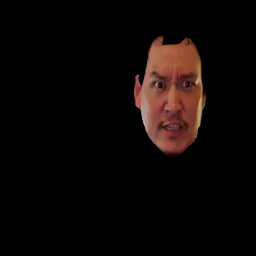

In [103]:
val_img[0]

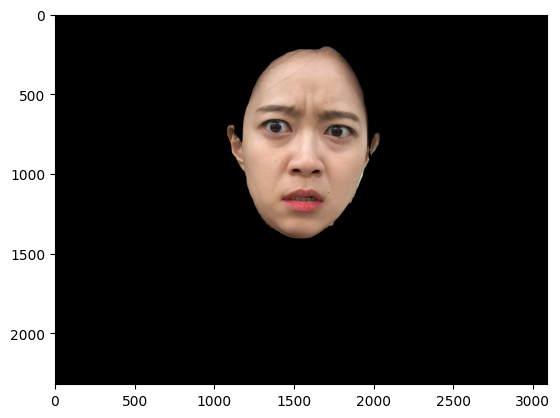

In [90]:
plt.imshow(test)